# Import statements

In [1]:
# enter the desired folder
%cd CloMu-main
%ls

import os
import numpy as np
import matplotlib.pyplot as plt

/Users/paolobresolin/Desktop/current working directory/code/CloMu-main
CloMu.py           Models/            analysis.py        overview.png
Demo.md            README.md          data/              results/
LICENSE            __pycache__/       overview-crop.png  script.py


# UTILITY FUNCTIONS

In [6]:
# Given dataset, it removes all trees longer than max_length. Then it saves the obtained dataset in path.
# max_length: maximum length of a tree, i.e., maximum number of different mutations a tree can contain.
# dataset: input dataset to process. It is a numpy array of lists. Each list is a patient and it is represented
#          as a list of trees. Given a patient, all associated trees have the same length. A tree is a list of edges.
# The function returns the created dataset as a numpy array.
def remove_long_trees(max_length, dataset):
    
    # create a new numpy array with the same size of dataset
    new_dataset = np.empty(shape=dataset.shape, dtype="object")
    # number of patients added to new_dataset so far
    number_added_patients = 0

    # iterate over the patients in the dataset
    for patient in dataset:

        # length of the trees associated with the current patient
        trees_length = len(patient[0])

        # save the patient in the new dataset only if it is not longer than max_length
        if trees_length <= max_length:
            new_dataset[number_added_patients] = patient
            number_added_patients += 1
        
    # reshape the numpy array so that it contains all and only the added patients
    new_dataset = new_dataset[:number_added_patients]

    # return the dataset
    return new_dataset

In [7]:
# Function that, given an input dataset of trees organized in patients, plots the number of trees related to each patient.
# input_dataset: the dataset contaning patients and, for each patient, some trees.
# scale: value to compute n_points.
# number_trees: tuple of size 3 composed by integers all lower than the total number of trees in the dataset. 
#               They are used to compute some statistics.
# The function displays 4 plots:
#   1. ordered by increasing patient indices;
#   2. ordered by number of trees in decreasing order;
#   3. the same as 2., but displaying only points from 0 to n_points - 1;
#   4. the same as 2., but displaying only points from len(input_dataset) - n_points to len(input_dataset) - 1.
# Moreover, the function prints the percetage of patients in the dataset with:
#   ~ at most number_trees[0] tree; 
#   ~ at most number_trees[1] trees;
#   ~ at most number_trees[2] trees.
def tree_patient_distribution(input_dataset, scale=100, number_of_trees=(1, 5, 10)):

    # x axis
    x = [i for i in range(len(input_dataset))]
    
    # y axis
    y = []

    # values for computing percentages
    perc_0 = 0
    perc_1 = 0
    perc_2 = 0

    # fill y with the number of trees for each patient and the values for computing percentages
    for patient in input_dataset:
        
        length = len(patient)
        y.append(length)
        
        if length <= number_of_trees[0]:
            perc_0 += 1
        if length <= number_of_trees[1]:
            perc_1 += 1
        if length <= number_of_trees[2]:
            perc_2 += 1

    # 1.
    fig, ax = plt.subplots()
    
    ax.stem(x, y)
    ax.set_title("Number of trees for each patient - patients order")
    ax.set_xlabel("patient index")
    ax.set_ylabel("number of trees")

    plt.show()
    

    # retrieve the indices that would sort y in decreasing order
    sorted_indices = np.argsort(y)[::-1]

    # 2.
    fig, ax = plt.subplots()
    
    ax.stem(x, [y[sorted_indices[i]] for i in range(len(sorted_indices))])
    ax.set_title("Number of trees for each patient - sorted")
    ax.set_xlabel("patients")
    ax.set_ylabel("number of trees")
    
    plt.show()

    # 3.
    n_points = len(input_dataset) // scale
    fig, ax = plt.subplots()
    
    ax.stem(x[:n_points], [y[sorted_indices[i]] for i in range(len(sorted_indices))][:n_points])
    ax.set_xticks(x[:n_points], sorted_indices[:n_points])
    ax.set_title("Number of trees for each patient - largest values")
    ax.set_xlabel("patient index")
    ax.set_ylabel("number of trees")

    for i in range(n_points):
        ax.annotate(str(y[sorted_indices[i]]), (x[i], y[sorted_indices[i]]), textcoords="offset points", xytext=(0, 5), ha="center")
    
    plt.show()

    # 4.
    fig, ax = plt.subplots()
    
    starting_point = len(x) - n_points
    ax.stem(x[starting_point:], [y[sorted_indices[i]] for i in range(len(sorted_indices))][starting_point:])
    ax.set_xticks(x[starting_point:], sorted_indices[starting_point:])
    ax.set_title("Number of trees for each patient - smallest values")
    ax.set_xlabel("patient index")
    ax.set_ylabel("number of trees")

    for i in range(starting_point, len(x)):
        ax.annotate(str(y[sorted_indices[i]]), (x[i], y[sorted_indices[i]]), textcoords="offset points", xytext=(0, 5), ha="center")
    
    plt.show()

    # print percentages
    n_patients_dataset = len(input_dataset)
    print()
    result = perc_0 / n_patients_dataset * 100
    formatted_results = f"{result:.{1}f}"
    print("Patients with at most " + str(number_of_trees[0]) +  " trees in the dataset: " + formatted_results + "%")
    result = perc_1 / n_patients_dataset * 100
    formatted_results = f"{result:.{1}f}"
    print("Patients with at most " + str(number_of_trees[1]) +  " trees in the dataset: " + formatted_results + "%")
    result = perc_2 / n_patients_dataset * 100
    formatted_results = f"{result:.{1}f}"
    print("Patients with at most " + str(number_of_trees[2]) +  " trees in the dataset: " + formatted_results + "%")

In [23]:
# Function that computes the relationship between patients and number of trees.
# dataset: input dataset.
# Returns a dictionary with the different numbers of trees as keys and how many patients in the dataset have that
# number of trees.
def compute_trees_per_patient(dataset):

    # create an empty dictionary
    dic = {}

    # fill the dictionary
    for patient in dataset:

        # number of trees contained by the current patient
        n_trees_patient = len(patient)

        # create the new (key, value) pair if it does not already exist
        if n_trees_patient not in dic:
            dic[n_trees_patient] = 1
        
        # update the (key, value) pair if it already exists
        else:
            dic[n_trees_patient] += 1
        
    return dic


In [115]:
# Function to plot the dictionary tree-patient returned from compute_trees_per_patient.
# dic: the dataset returned by compute_trees_per_patient.
# bars_w_s: tuple where the first value is the width of bars and the second is the spacing among them.
# size: bi-dimensional tuple representing the size of the figure to plot.
# Plots the dictionary.
def plot_tree_patient_dic(dic, bars_w_s = (1, 0.5), size=(20, 15)):

    # extract keys and values for plotting
    x_values = list(dic.keys())
    y_values = list(dic.values())

    # sort the pairs by number of trees
    sorted_indices = np.argsort(x_values)
    sorted_x_values = [x_values[sorted_indices[i]] for i in range(len(sorted_indices))]
    sorted_y_values = [y_values[sorted_indices[i]] for i in range(len(sorted_indices))]

    # plot the pairs
    fig, ax = plt.subplots(figsize=size)

    # set bar width and space among bars
    bar_width, bar_spacing = bars_w_s

    # compute the x coordinates
    x = np.arange(len(sorted_x_values)) * (bar_width + bar_spacing)

    # create bars
    bars = ax.bar(x, sorted_y_values, width=bar_width, edgecolor="blue", linewidth=0.7)

    # set positions and labels for bars in the x axis
    ax.set_xticks(x)
    ax.set_xticklabels(sorted_x_values)

    # set a label with the y value above each bar
    for bar, label in zip(bars, sorted_y_values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

    # set title and labels for the axes
    ax.set_title("Trees Distribution")
    ax.set_xlabel("Number of Trees")
    ax.set_ylabel("Number of Patients")
    
    # show the plot
    plt.show()

In [78]:
# Function that computes the number of trees in a dataset.
# dataset: input dataset of trees organized in patients.
# Returns the number of trees in the dataset.
def compute_trees(dataset):

    # initialize the number of trees in dataset
    n_trees = 0

    # iterate through patients to compute the number of trees
    for patient in dataset:
        n_trees += len(patient)
    
    return n_trees

# BREAST CANCER DATASET

### Paths

In [3]:
# path to the current directory
current_dir = os.getcwd()

# path to the input dataset
breast_dataset = os.path.join(current_dir, "data", "realData", "breastCancer.npy")

### Dataset analysis

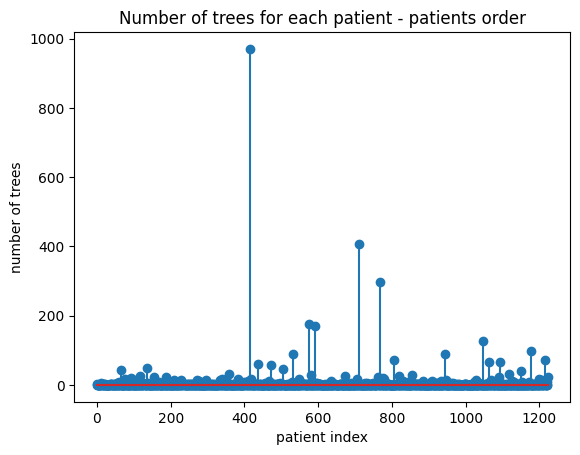

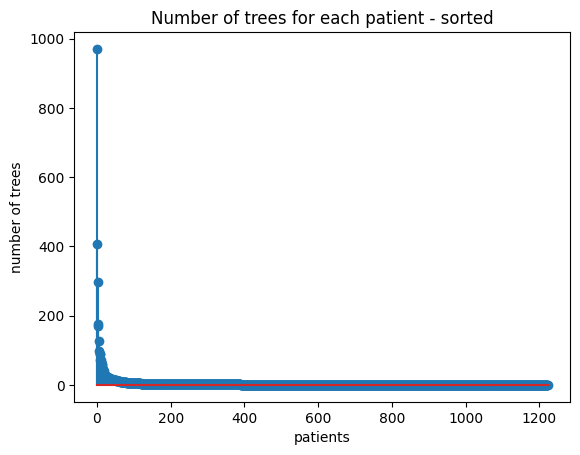

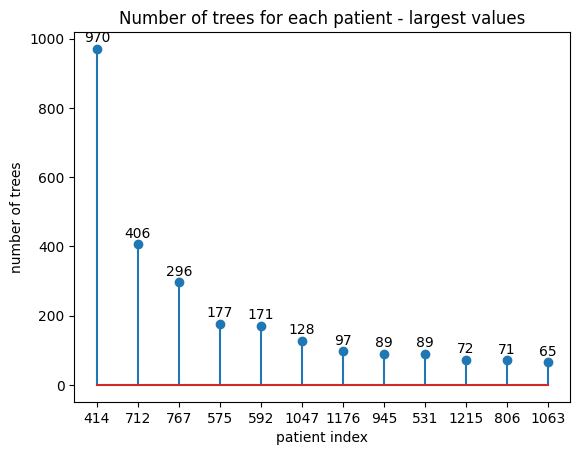

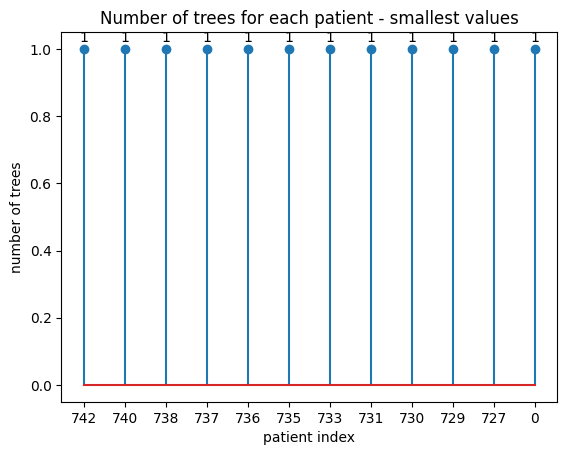


Patients with at most 1 trees in the dataset: 68.1%
Patients with at most 5 trees in the dataset: 92.5%
Patients with at most 10 trees in the dataset: 95.0%


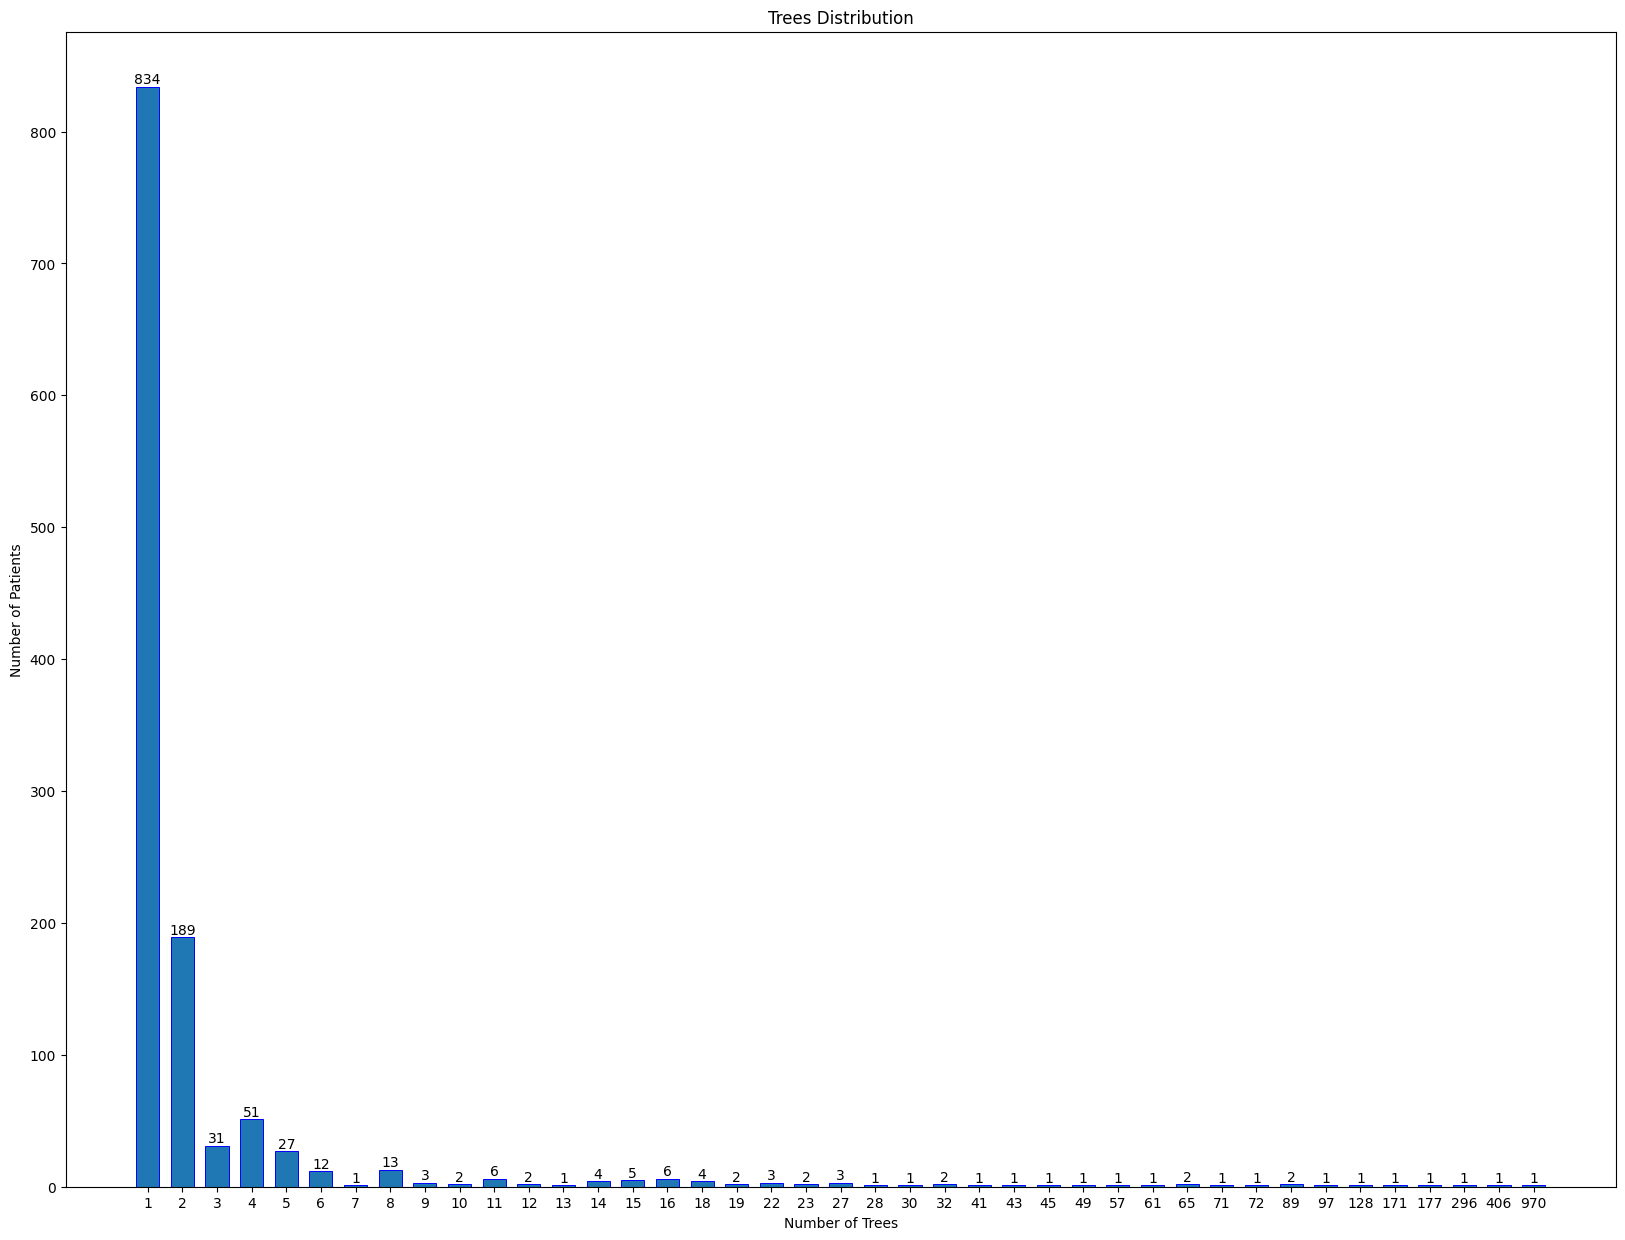

Number of patients in the dataset: 1224
Number of trees in the dataset: 5621


In [116]:
# maximum number of mutations allowed for each tree, i.e., maximum tree length
maxM = 9

# load the original dataset as a numpy array
treeData = np.load(breast_dataset, allow_pickle=True)

# remove too long trees
treeData = remove_long_trees(maxM, treeData)

# plot how many trees each patient in the dataset has 
tree_patient_distribution(treeData)

# dictionary for tree-patient distribution
dic_tree_patient = compute_trees_per_patient(treeData)

# plot the dictionary
plot_tree_patient_dic(dic_tree_patient)

# compute and print the number of patients and trees in the dataset
print("Number of patients in the dataset: " + str(len(treeData)))
print("Number of trees in the dataset: " + str(compute_trees(treeData)))

# AML DATASET

### Paths

In [80]:
# path to the input dataset
AML_dataset = os.path.join(current_dir, "data", "realData", "AML.npy")

### Dataset analysis

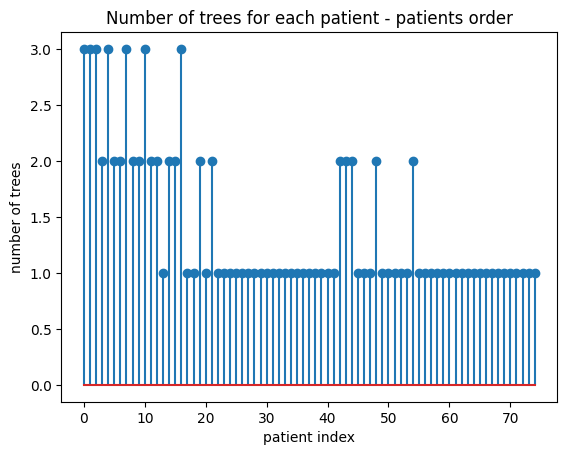

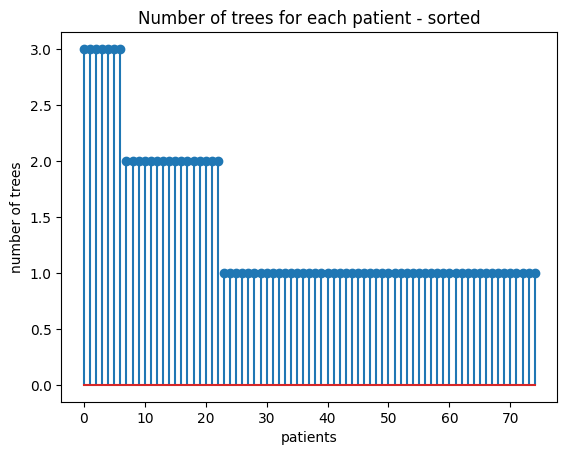

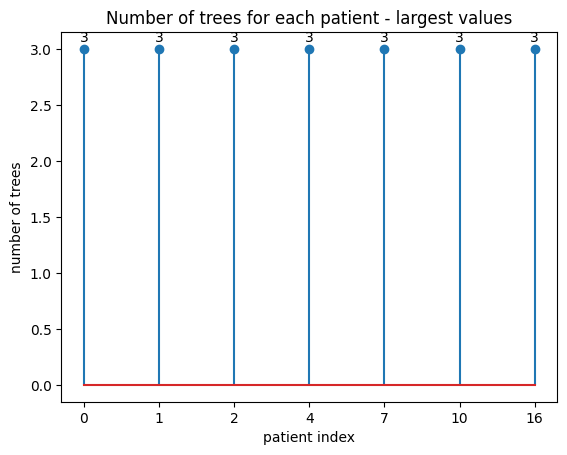

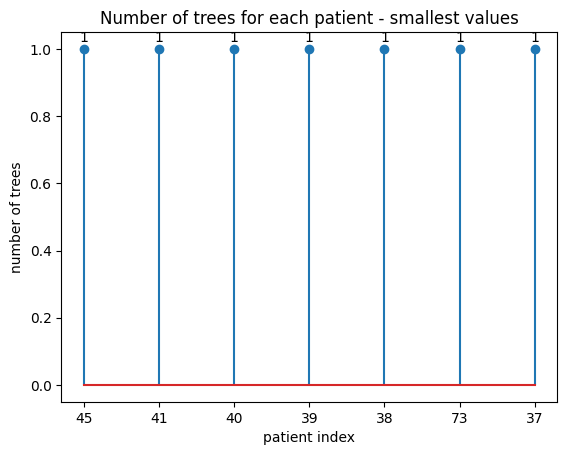


Patients with at most 1 trees in the dataset: 69.3%
Patients with at most 2 trees in the dataset: 90.7%
Patients with at most 3 trees in the dataset: 100.0%


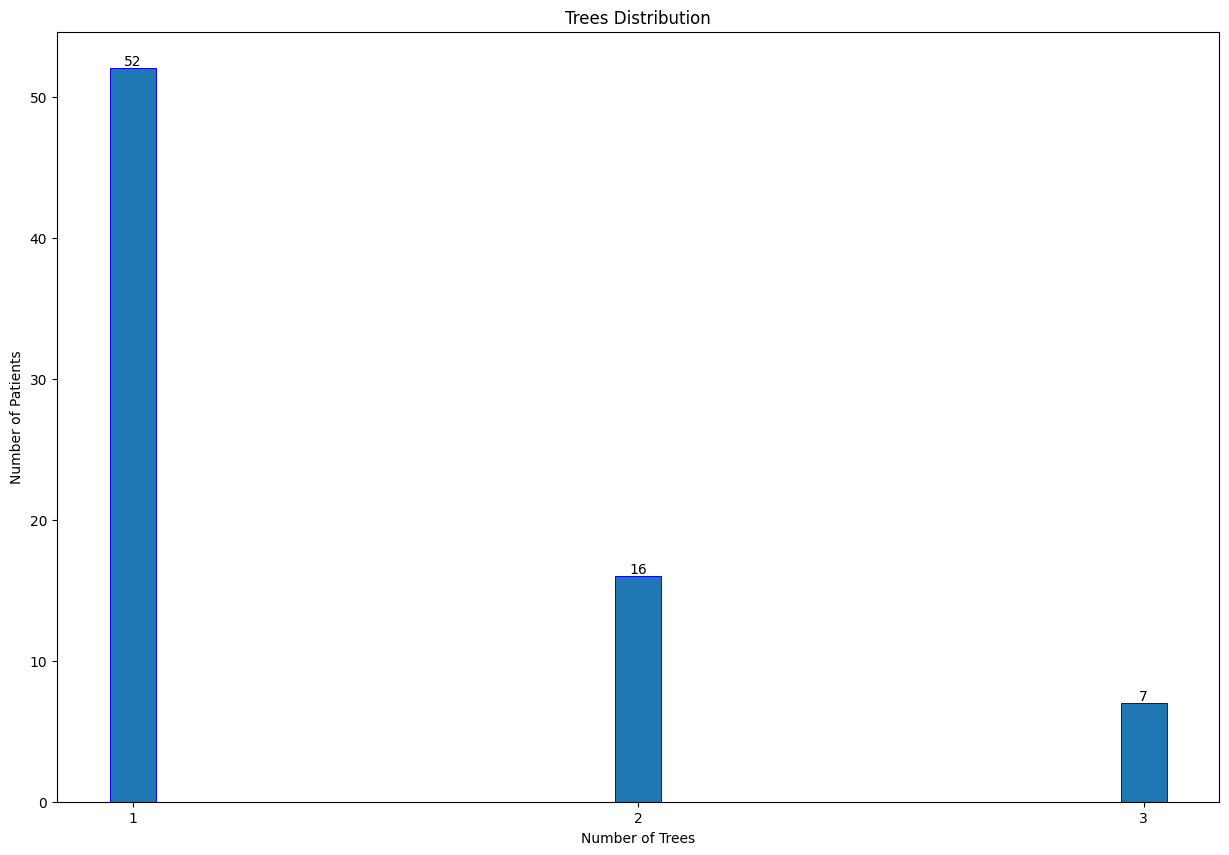

Number of patients in the dataset: 75
Number of trees in the dataset: 105


In [125]:
# maximum number of mutations allowed for each tree, i.e., maximum tree length
maxM = 10

# load the original dataset as a numpy array
treeData_AML = np.load(AML_dataset, allow_pickle=True)

# remove too long trees
treeData_AML = remove_long_trees(maxM, treeData_AML)

# plot how many trees each patient in the dataset has 
tree_patient_distribution(treeData_AML, scale=10, number_of_trees=(1, 2, 3))

# dictionary for tree-patient distribution
dic_tree_patient_AML = compute_trees_per_patient(treeData_AML)

# plot the dictionary
plot_tree_patient_dic(dic_tree_patient_AML, bars_w_s=(1, 10), size=(15, 10))

# compute and print the number of patients and trees in the dataset
print("Number of patients in the dataset: " + str(len(treeData_AML)))
print("Number of trees in the dataset: " + str(compute_trees(treeData_AML)))